# Часть 3: методы оценки модельного риска

Анализ проводится с точки зрения консервативности, точности и эффективности.

### Библиотеки

In [1]:
import pandas as pd
import numpy as np
import math
import random

import datetime
from datetime import datetime

from copy import copy, deepcopy

import sys
import warnings
import os

In [2]:
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import norm, skewnorm, gennorm, t, nct, genpareto, genextreme, genhyperbolic, chi2, ncx2

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# модуль для оценки модельного риска, реализованный в рамках вкр

from model_risk import Model_risk_calculation

In [6]:
folder = '/content/drive/MyDrive/Kagan_VKR/'

folder_dict = {'IMOEX': '1_imoex',
               'BCOMCO': '2_bcomco',
               'EUR_RUB': '4_euro',
               'Газпром': '5_gazprom'}

In [7]:
def download_data(name, file_name, window, freq):
    d = pd.read_excel(folder+folder_dict[name]+f"/{name}_{file_name}.xlsx")
    d.set_index('Date', inplace=True)
    d = d[(d['Window'] == window) & (d['Frequency'] == freq)].drop(['Window', 'Frequency'], axis=1)
    return d

## BCOMCO

In [8]:
df_oil = download_data('BCOMCO', file_name='final', window=250, freq=25)

In [9]:
bcomco_mr = Model_risk_calculation(df_var=df_oil, name='BCOMCO', models=['HS', 'norm', 'skew norm', 'GGD', 'GPD', 'GEV', 'GHYP', 'LSTM'])

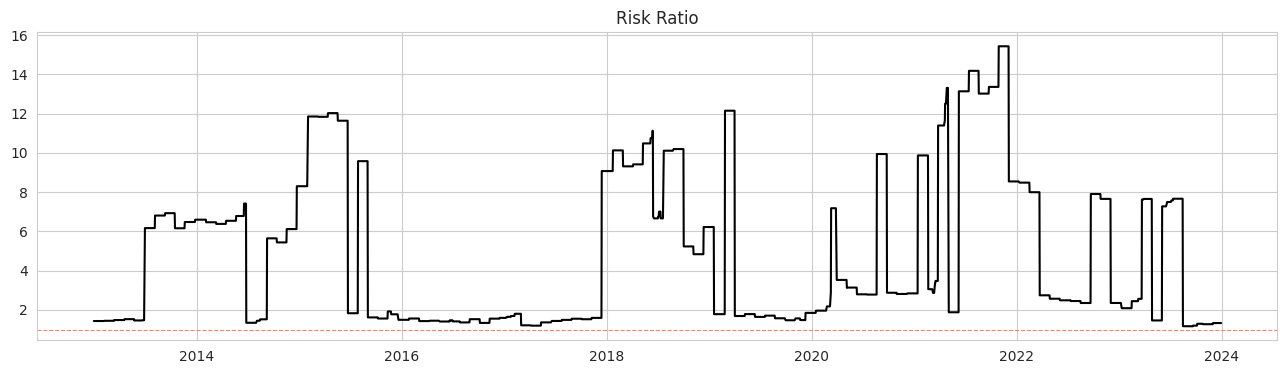

In [10]:
bcomco_mr.risk_ratio()

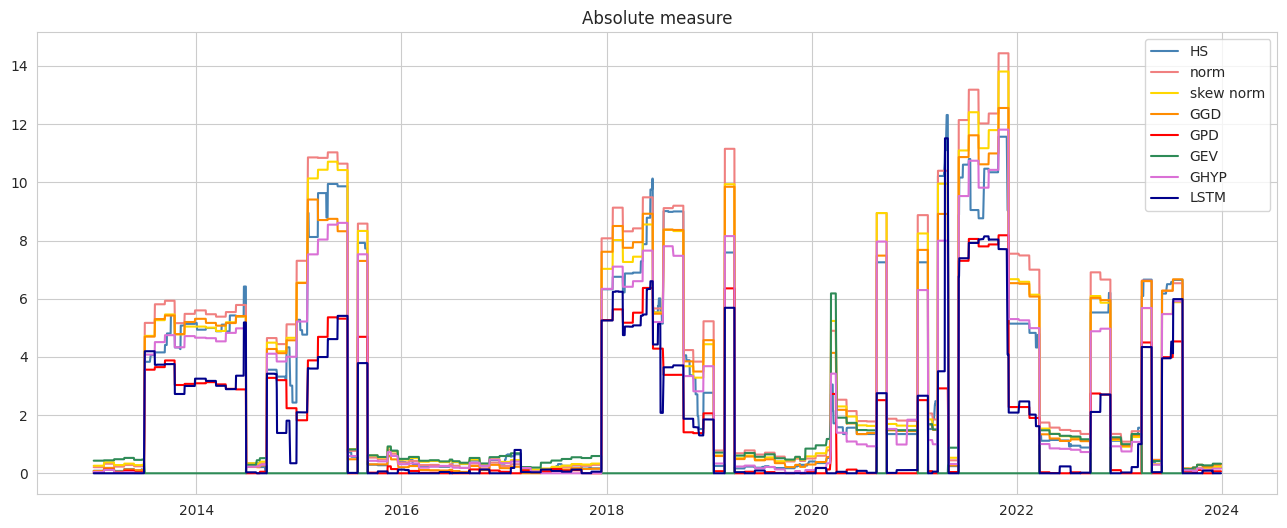

Чем меньше показатель, тем ниже значение модельного риска (лучше).



,AM среднее
Метод,
Обобщенное распределение экстремальных значений,0.458044
LSTM,1.728136
Обобщенное Парето распределение,1.740743
Обобщенное гиперболическое распределение,2.899457
Исторический метод,3.073022
Обобщенное нормальное распределение,3.293948
Скошенное нормальное распределение,3.468457
Нормальное распределение,3.749852


In [11]:
bcomco_mr.absolute_measure()

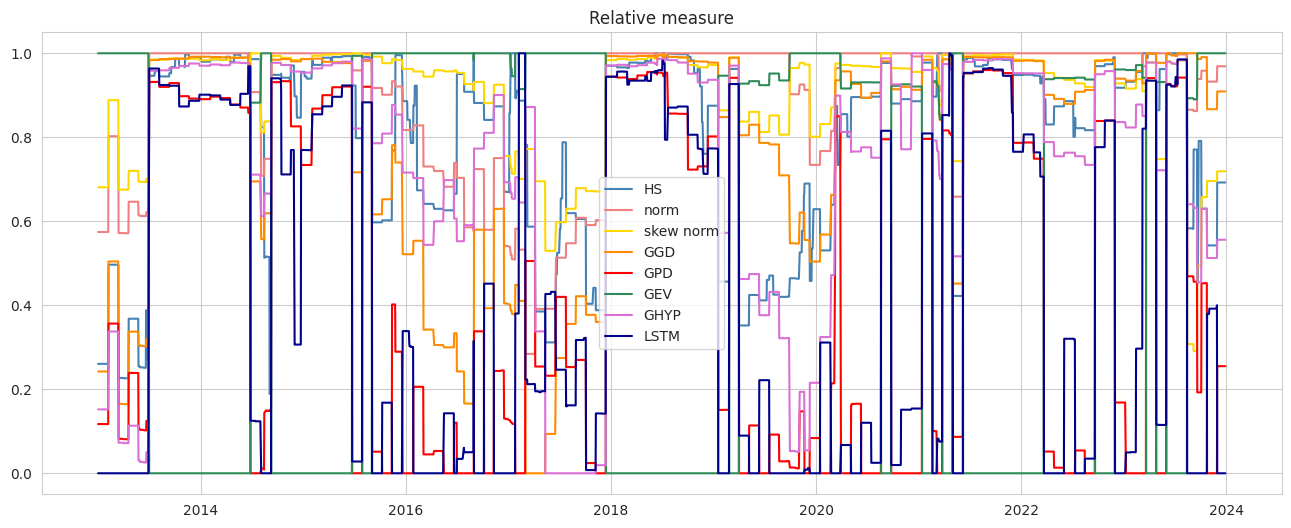

Чем меньше показатель, тем ниже значение модельного риска (лучше).



,RM среднее
Метод,
LSTM,0.428491
Обобщенное Парето распределение,0.439027
Обобщенное распределение экстремальных значений,0.559747
Обобщенное гиперболическое распределение,0.728596
Обобщенное нормальное распределение,0.77802
Исторический метод,0.800814
Нормальное распределение,0.89385
Скошенное нормальное распределение,0.905226


In [12]:
bcomco_mr.relative_measure()

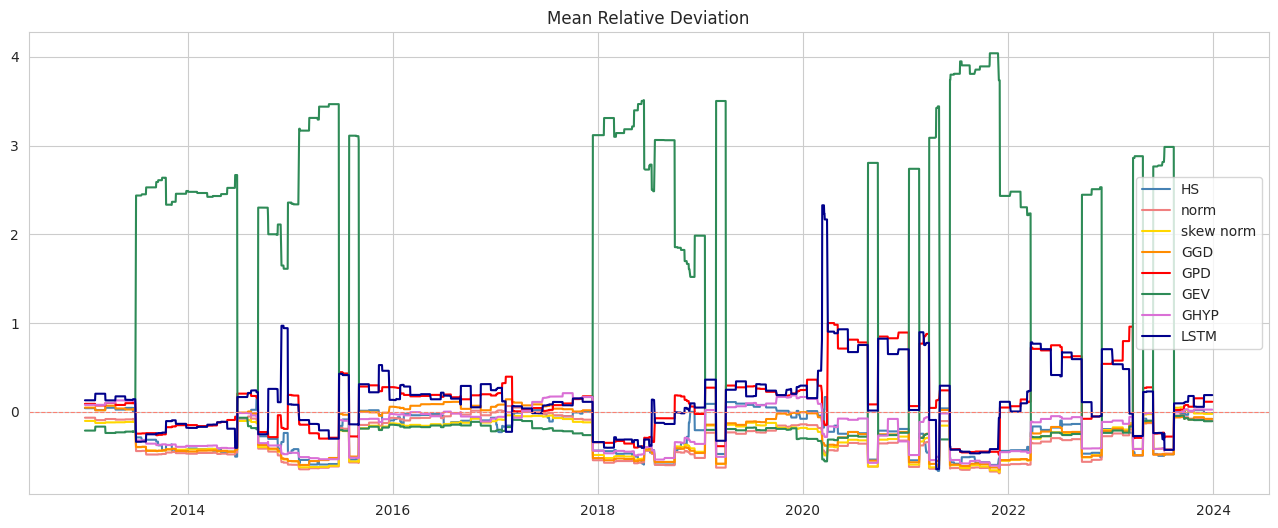

При отрицательном значении показатель больше подвержена модельному риску, при положительном — меньше.



,MRD среднее
Метод,
Обобщенное распределение экстремальных значений,1.078094
LSTM,0.123221
Обобщенное Парето распределение,0.109188
Обобщенное гиперболическое распределение,-0.195123
Исторический метод,-0.234836
Обобщенное нормальное распределение,-0.250156
Скошенное нормальное распределение,-0.308233
Нормальное распределение,-0.322155


In [13]:
bcomco_mr.mean_relative_deviation()

In [14]:
bcomco_mr.modified_binary_loss_function()

Чем ниже значение показателя, тем ближе к заданному уровню доверия (лучше).



,MBLF
Метод,
Обобщенное распределение экстремальных значений,0.001909
Исторический метод,0.003353
Обобщенное гиперболическое распределение,0.003713
Обобщенное Парето распределение,0.003865
LSTM,0.005669
Обобщенное нормальное распределение,0.008405
Скошенное нормальное распределение,0.011653
Нормальное распределение,0.012375


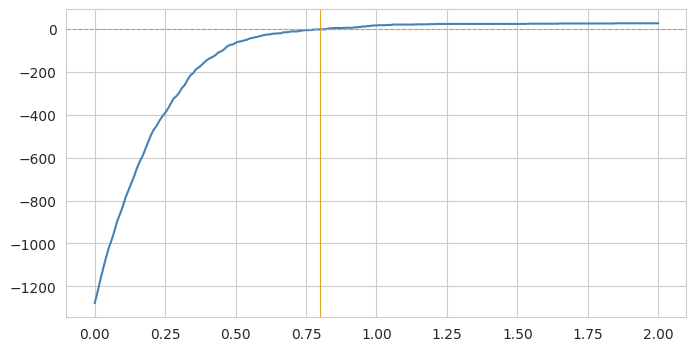

0.8

In [15]:
bcomco_mr.moc_method('LSTM', plot_=1)

In [17]:
bcomco_mr.moc()

Чем ближе индикатор к единице, тем точнее модель.



,MOC
Метод,
LSTM,0.8
Обобщенное Парето распределение,0.87
Обобщенное распределение экстремальных значений,1.03
Обобщенное гиперболическое распределение,1.11
Исторический метод,1.13
Обобщенное нормальное распределение,1.27
Скошенное нормальное распределение,1.31
Нормальное распределение,1.39


Чем ближе индикатор к единице, тем точнее модель.



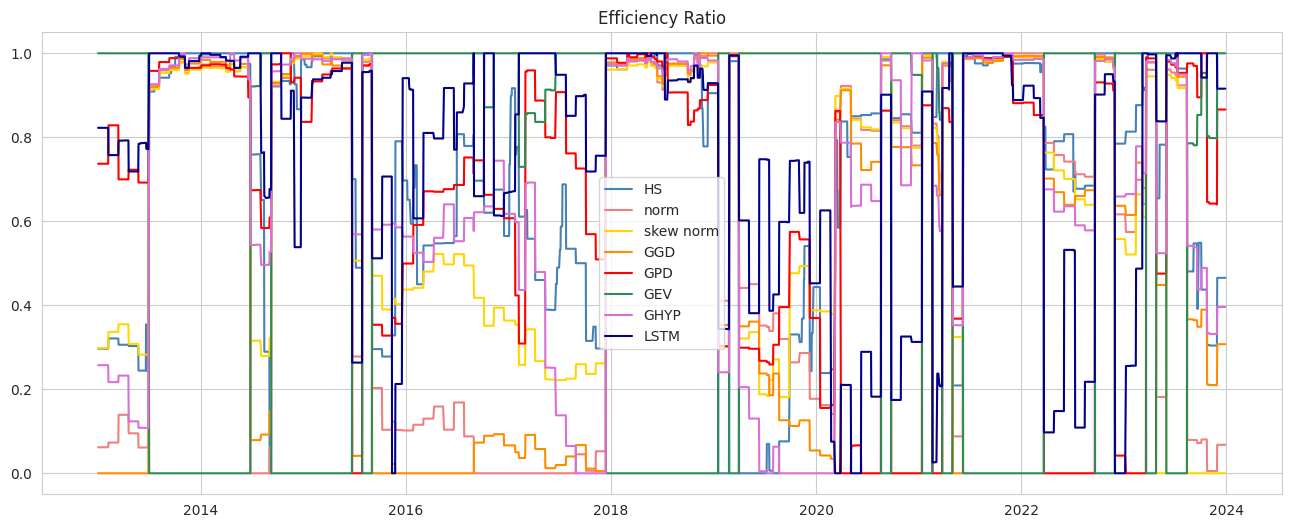

Чем ближе коэффициент к единице, тем эффективнее модель. 



,ER
Метод,
LSTM,0.752225
Исторический метод,0.716031
Обобщенное гиперболическое распределение,0.667395
Скошенное нормальное распределение,0.658119
Обобщенное Парето распределение,0.654052
Нормальное распределение,0.580953
Обобщенное распределение экстремальных значений,0.563085
Обобщенное нормальное распределение,0.563069


In [18]:
bcomco_mr.efficiency_ratio()

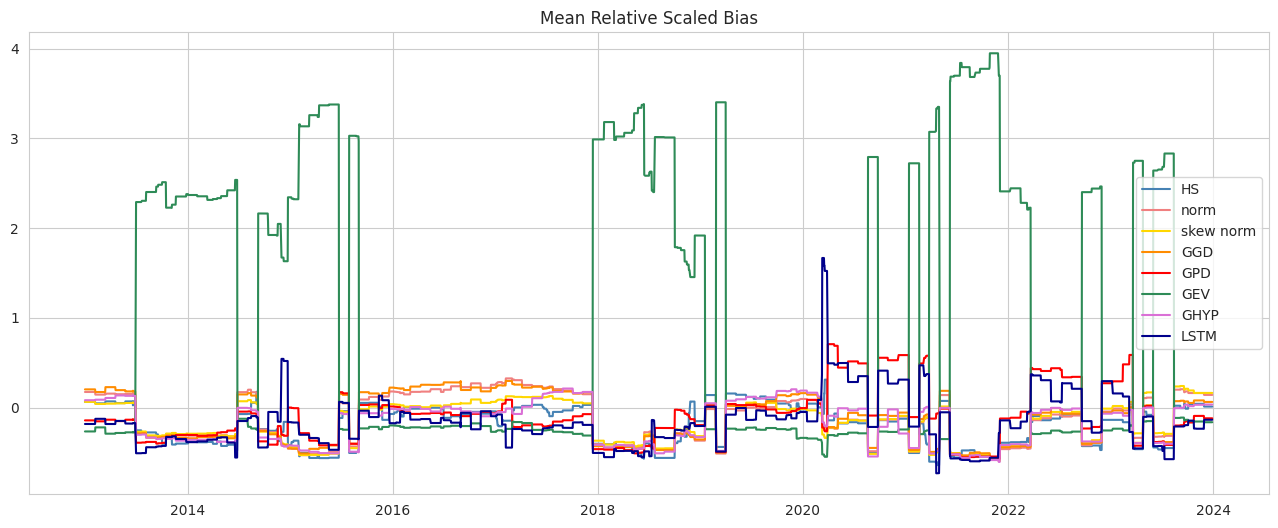

,MRSB
Метод,
Исторический метод,-0.195561
Нормальное распределение,-0.12503
Скошенное нормальное распределение,-0.15748
Обобщенное нормальное распределение,-0.115396
Обобщенное Парето распределение,-0.097537
Обобщенное распределение экстремальных значений,1.01887
Обобщенное гиперболическое распределение,-0.169056
LSTM,-0.158809


In [19]:
bcomco_mr.mean_relative_scaled_bias()

In [20]:
bcomco_mr.magnitude_loss_function()

Чем меньше значение показателя, тем менее глубокое пробитие. 



,LMLF,MLF
Метод,,
LSTM,0.004339,0.004218
Обобщенное Парето распределение,0.006149,0.005975
Обобщенное распределение экстремальных значений,0.011935,0.011652
Исторический метод,0.013378,0.013016
Обобщенное гиперболическое распределение,0.013738,0.013374
Обобщенное нормальное распределение,0.018436,0.017992
Скошенное нормальное распределение,0.021687,0.021193
Нормальное распределение,0.022411,0.021872


In [21]:
bcomco_res = bcomco_mr.get_result()

#bcomco_res.to_excel(folder+'2_bcomco/oil_mr_250_25.xlsx')

In [22]:
bcomco_res

,AM среднее,RM среднее,MRD среднее,MBLF,MOC_x,MOC_y,MOC,ER,MRSB,LMLF,MLF
Метод,,,,,,,,,,,
Исторический метод,3.073022,0.800814,-0.234836,0.003353,1.13,1.13,1.13,0.716031,-0.195561,0.013378,0.013016
Нормальное распределение,3.749852,0.89385,-0.322155,0.012375,1.39,1.39,1.39,0.580953,-0.12503,0.022411,0.021872
Скошенное нормальное распределение,3.468457,0.905226,-0.308233,0.011653,1.31,1.31,1.31,0.658119,-0.15748,0.021687,0.021193
Обобщенное нормальное распределение,3.293948,0.77802,-0.250156,0.008405,1.27,1.27,1.27,0.563069,-0.115396,0.018436,0.017992
Обобщенное Парето распределение,1.740743,0.439027,0.109188,0.003865,0.87,0.87,0.87,0.654052,-0.097537,0.006149,0.005975
Обобщенное распределение экстремальных значений,0.458044,0.559747,1.078094,0.001909,1.03,1.03,1.03,0.563085,1.01887,0.011935,0.011652
Обобщенное гиперболическое распределение,2.899457,0.728596,-0.195123,0.003713,1.11,1.11,1.11,0.667395,-0.169056,0.013738,0.013374
LSTM,1.728136,0.428491,0.123221,0.005669,0.8,0.8,0.8,0.752225,-0.158809,0.004339,0.004218


## Газпром

In [ ]:
df_gazp = download_data('Газпром', file_name='final', window=250, freq=25)

In [ ]:
gazp_mr = Model_risk_calculation(df_var=df_gazp, name='Газпром', models=['HS', 'norm', 'skew norm', 'GGD', 'GPD', 'GEV', 'LSTM'])

In [ ]:
gazp_mr.risk_ratio()

In [ ]:
gazp_res = gazp_mr.model_risk_final()
gazp_res.to_excel(folder+'5_gazprom/gazp_mr_250_25.xlsx')

In [ ]:
gazp_res

,AM среднее,RM среднее,MRD среднее,MBLF,MOC,ER,MRSB,LMLF,MLF
Метод,,,,,,,,,
Исторический метод,5.304867,0.825422,-0.319938,0.005348,1.12,0.653458,-0.242482,0.015404,0.014972
Нормальное распределение,5.252065,0.839131,-0.328787,0.004666,1.18,0.541674,-0.211193,0.014724,0.014279
Скошенное нормальное распределение,5.210812,0.925827,-0.374655,0.006371,1.23,0.648375,-0.235275,0.016431,0.015949
Обобщенное нормальное распределение,3.78761,0.613434,-0.023608,0.000791,0.98,0.610414,-0.046545,0.00926,0.008903
Обобщенное Парето распределение,1.585074,0.375039,0.121471,0.005907,0.75,0.771783,-0.165874,0.004124,0.003913
Обобщенное распределение экстремальных значений,0.950735,0.665895,0.793549,0.00603,1.23,0.485806,1.069437,0.016073,0.015686
LSTM,1.74315,0.356196,0.131969,0.005225,0.74,0.735149,-0.168067,0.004797,0.004622


## Курс евро

In [ ]:
df_euro = download_data(name='EUR_RUB', file_name='final', window=250, freq=25)

In [ ]:
euro_mr = Model_risk_calculation(df_var=df_euro, name='EUR_RUB', models=['HS', 'norm', 'skew norm', 'GGD', 'GPD', 'GEV', 'GHYP', 'LSTM'])

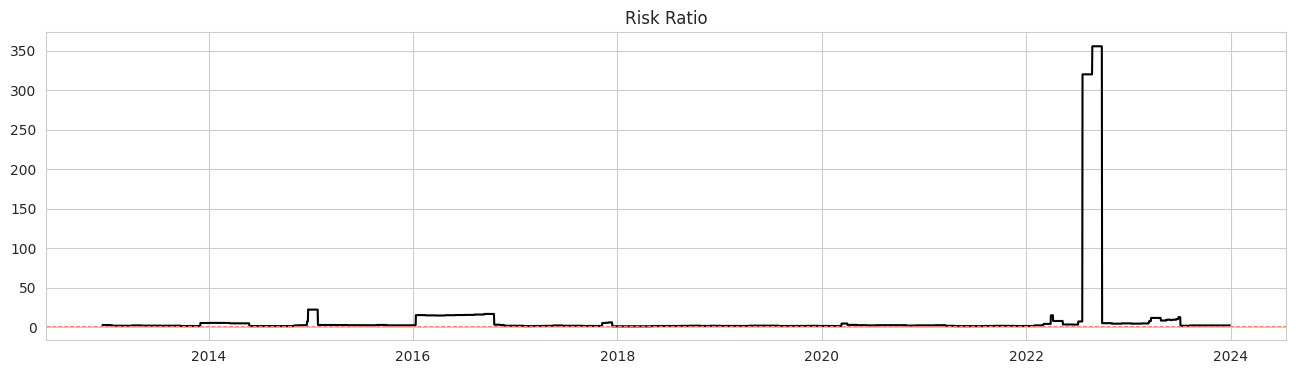

In [ ]:
euro_mr.risk_ratio()

In [ ]:
euro_res = euro_mr.model_risk_final()
euro_res.to_excel(folder+'4_euro/euro_mr_250_25.xlsx')

,AM среднее,RM среднее,MRD среднее,MBLF,MOC,ER,MRSB,LMLF,MLF
Метод,,,,,,,,,
Исторический метод,2.1714,0.76512,-0.180235,0.004251,1.1,0.894636,-0.227847,0.014339,0.013854
Нормальное распределение,2.12544,0.799575,-0.19339,0.010507,1.27,0.789147,-0.119593,0.020597,0.020093
Скошенное нормальное распределение,2.299302,0.910567,-0.268312,0.012593,1.36,0.817434,-0.147283,0.022692,0.022105
Обобщенное нормальное распределение,1.863509,0.601932,-0.095236,0.001123,1.06,0.839376,-0.179668,0.01121,0.010745
Обобщенное Парето распределение,0.714162,0.233504,0.328484,0.002353,0.89,0.628394,0.025962,0.007699,0.007349
Обобщенное распределение экстремальных значений,0.949624,0.839899,0.190441,0.013636,1.41,0.691221,0.387815,0.02373,0.023158
Обобщенное гиперболическое распределение,7.907212,0.705301,-0.16597,0.015026,1.84,0.211085,0.308561,0.025118,0.024449
LSTM,0.675547,0.201981,0.384219,0.005134,0.79,0.725912,-0.047946,0.004906,0.004662


In [ ]:
euro_res